In [4]:
# pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import joblib

In [6]:
data = pd.read_csv("energydata_complete.csv")

In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
df.shape

(19735, 29)

In [12]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## EDA

In [13]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
num_cols = df.select_dtypes(include="number")

In [16]:
num_cols

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## CHECK OUTLIERS

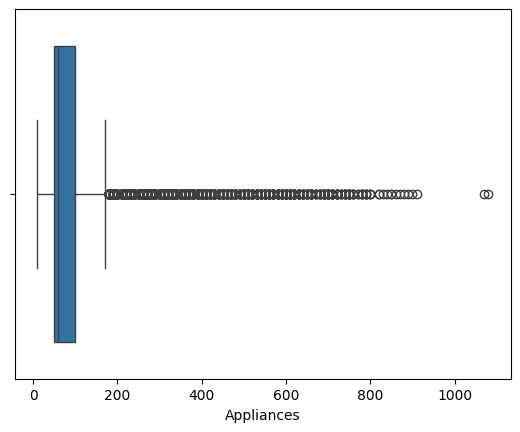

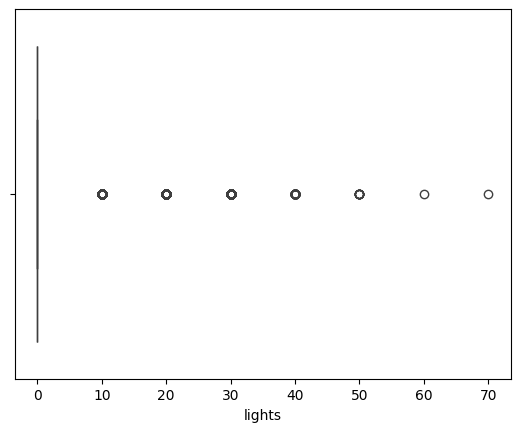

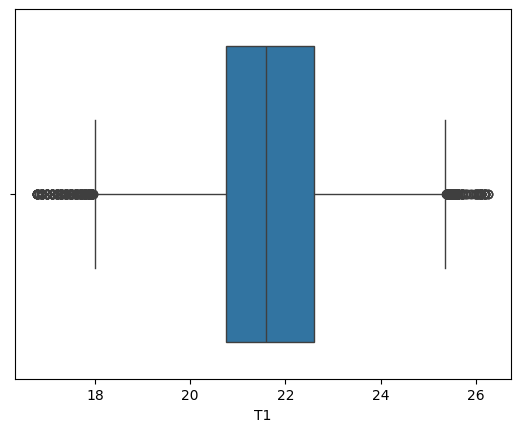

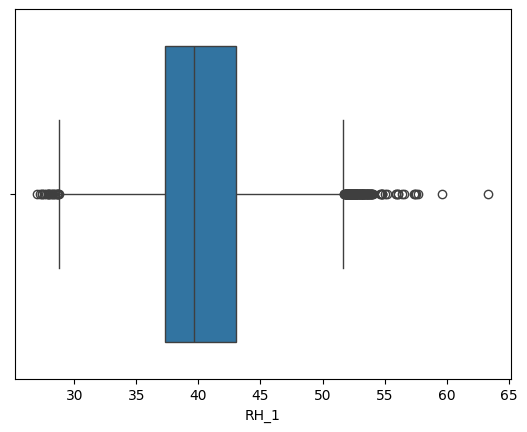

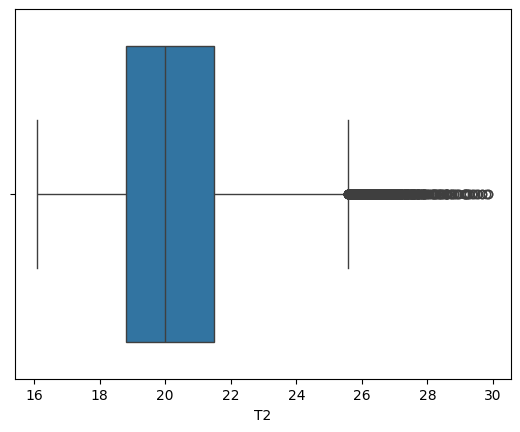

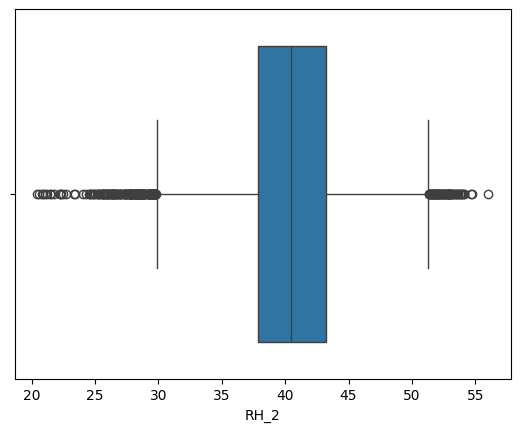

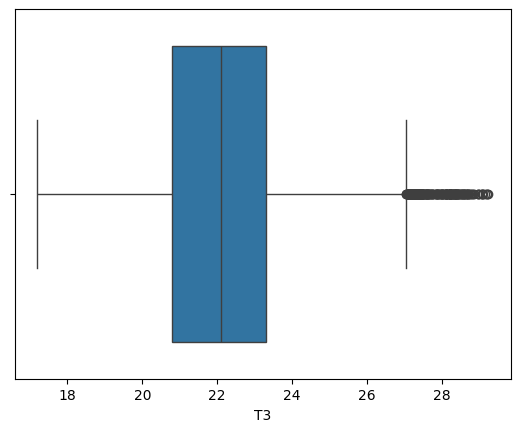

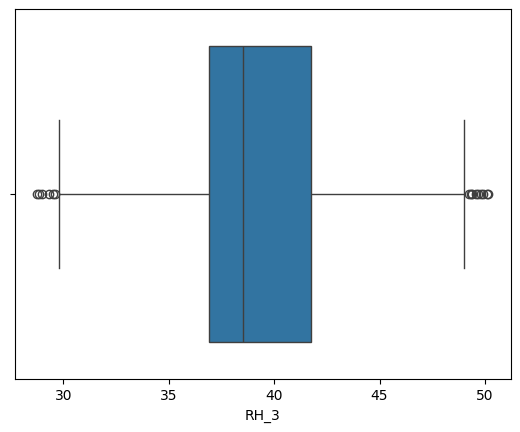

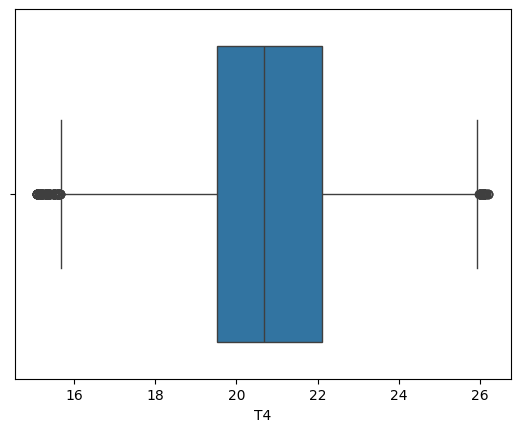

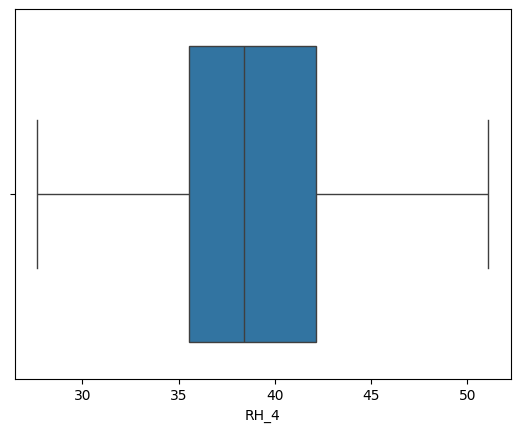

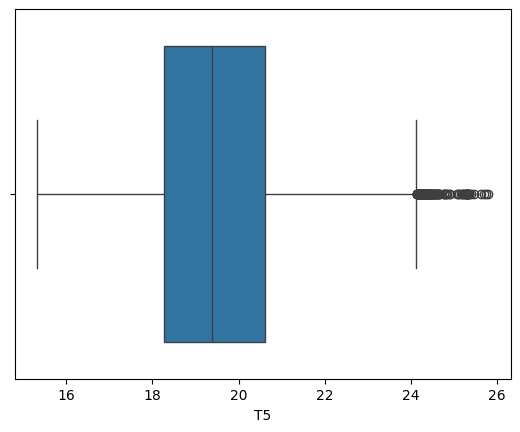

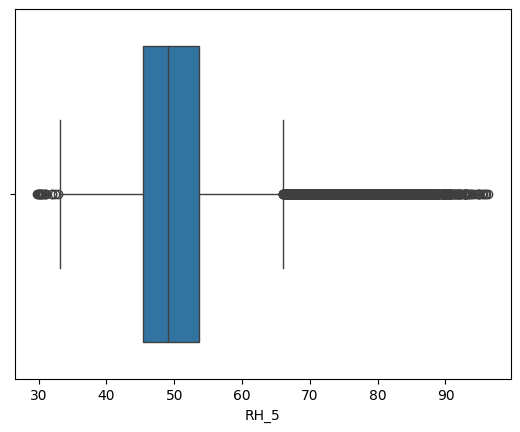

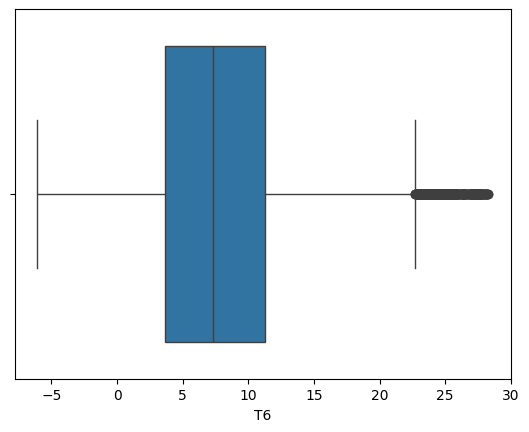

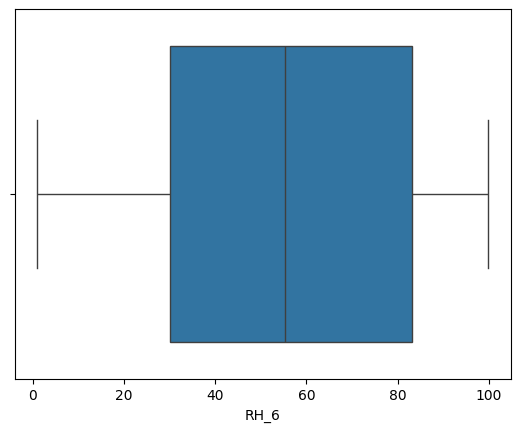

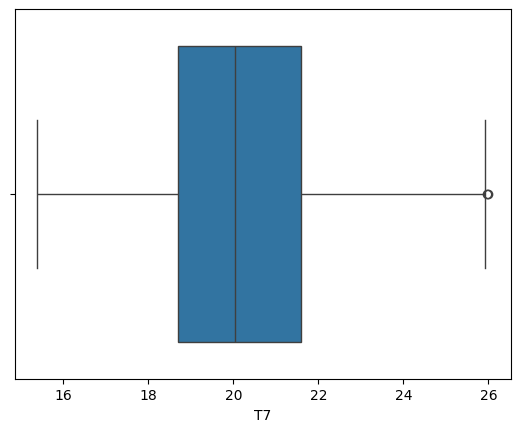

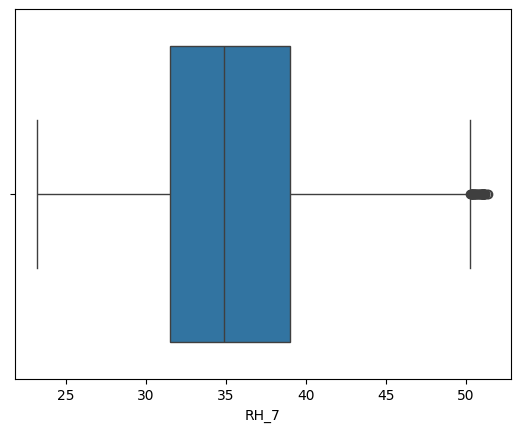

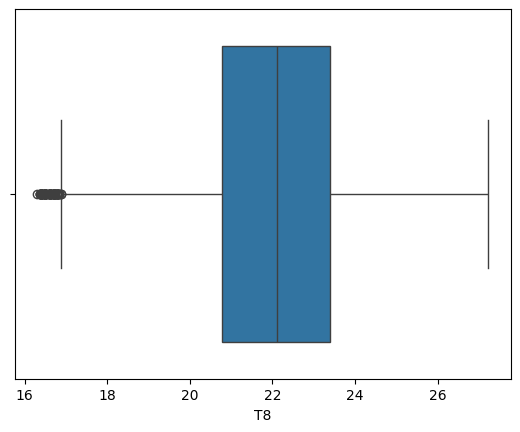

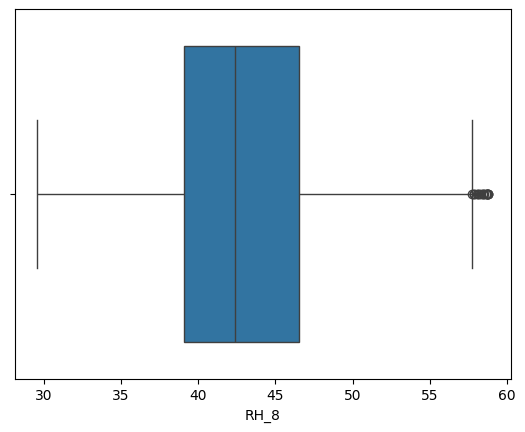

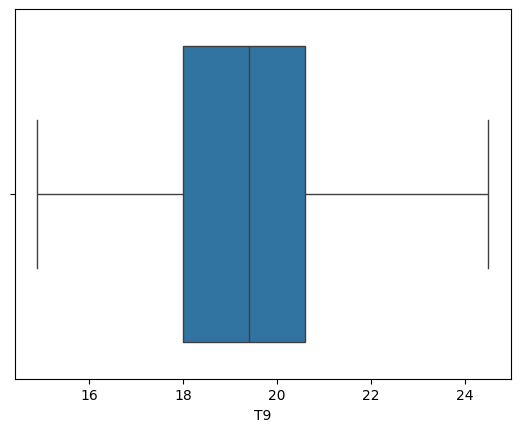

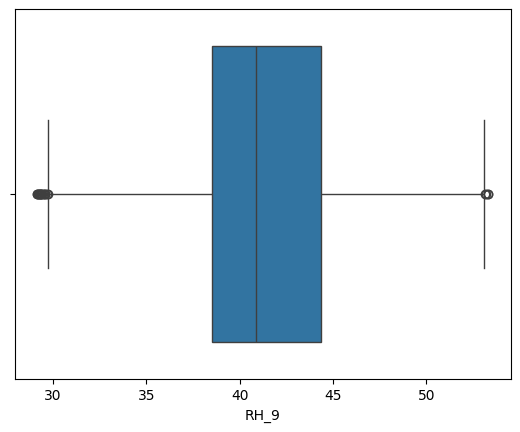

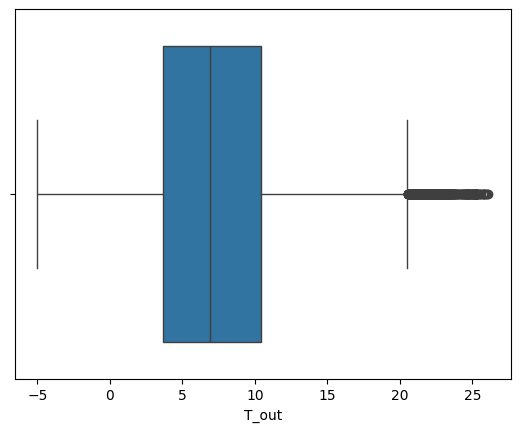

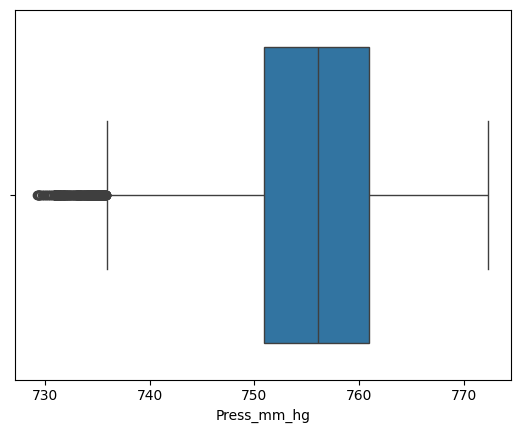

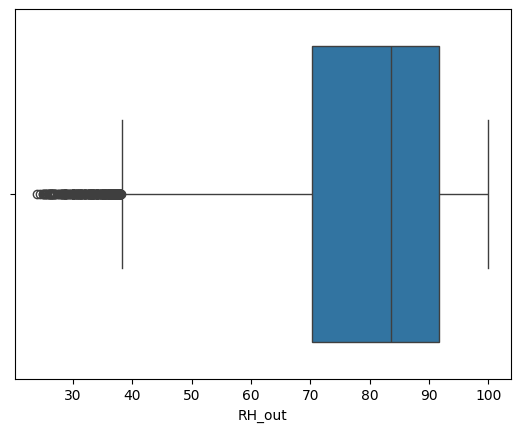

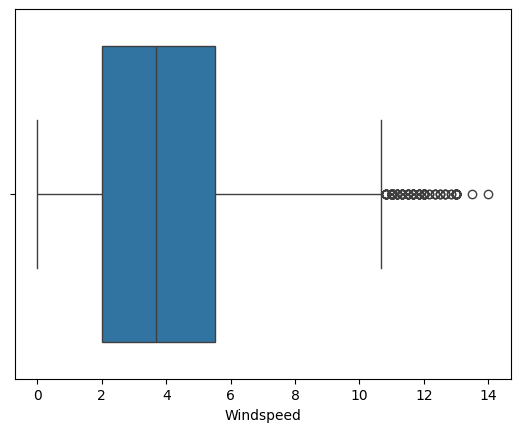

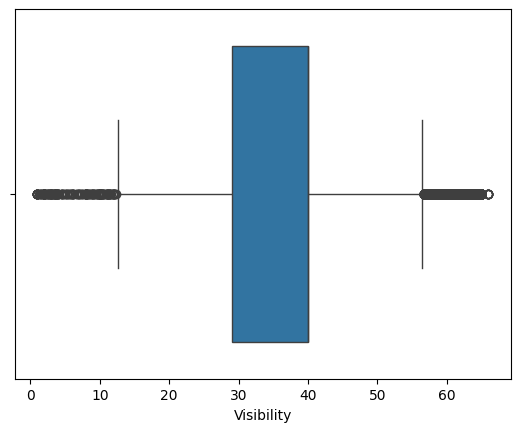

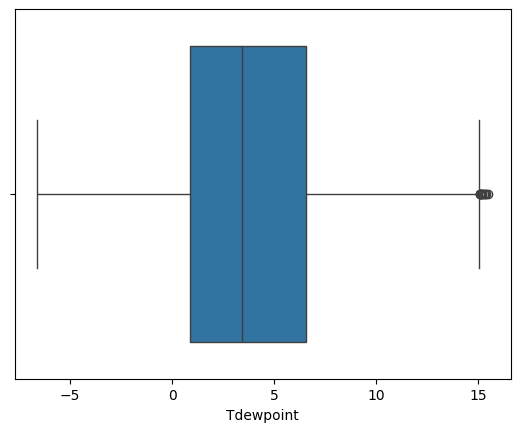

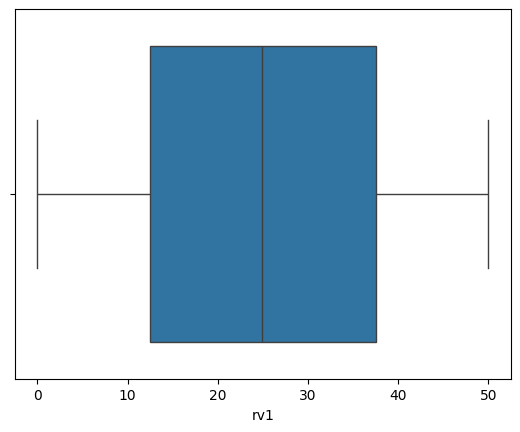

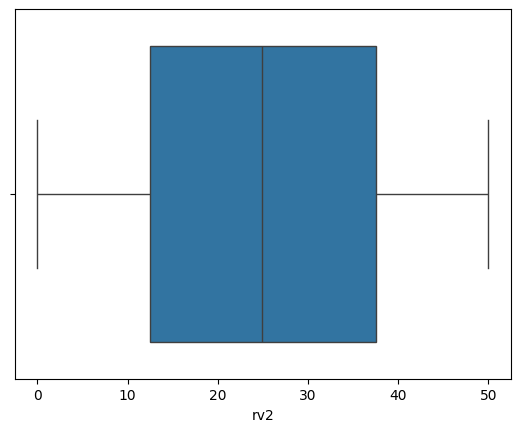

In [17]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [18]:
# plt.figure(figsize=(15,10))
# sns.boxplot(df)

## REMOVING OUTLIERS USING IQR METHOD

In [19]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [20]:
df1 = Handling_Outliers(df)

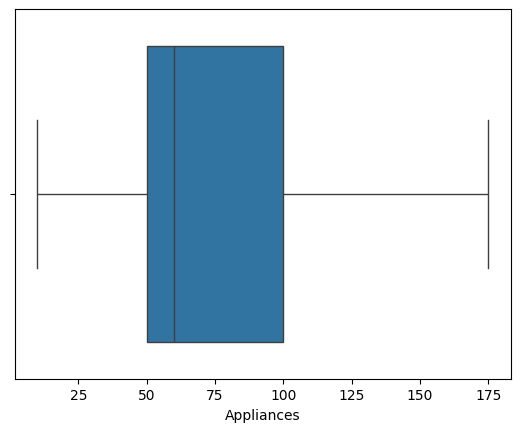

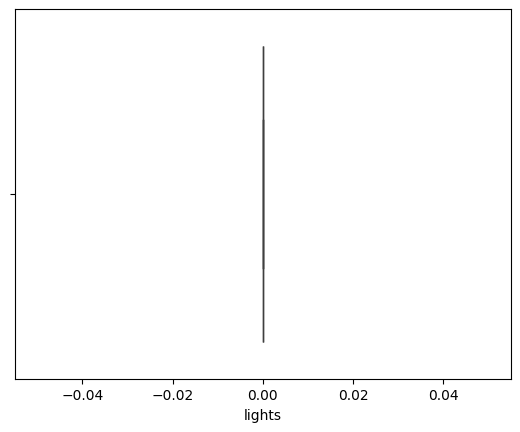

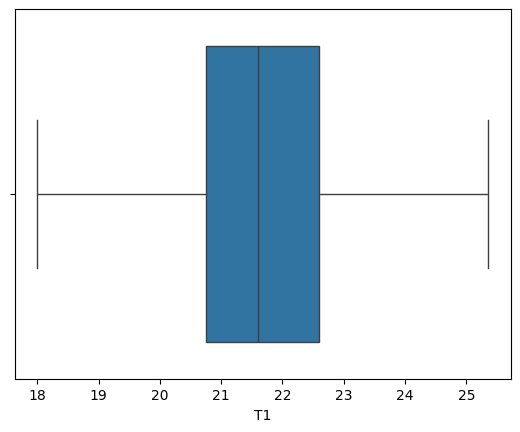

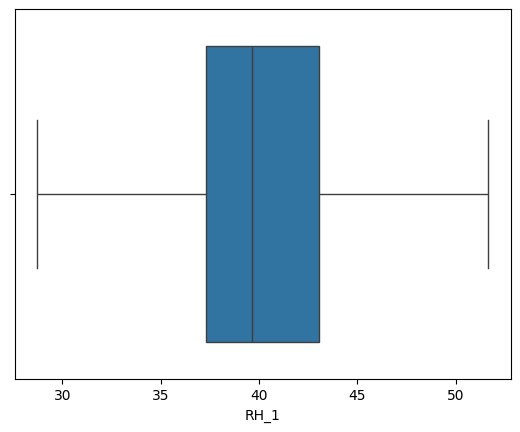

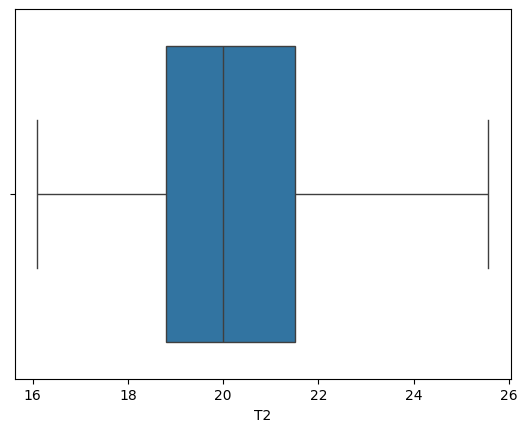

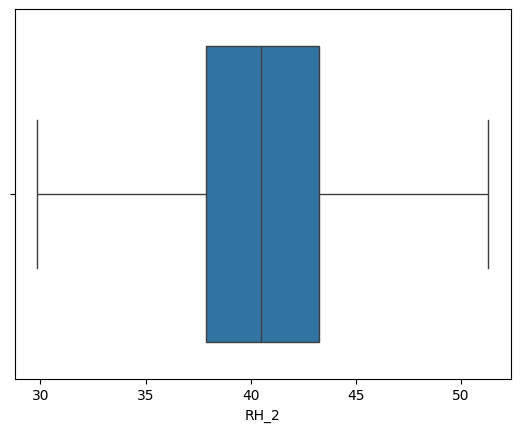

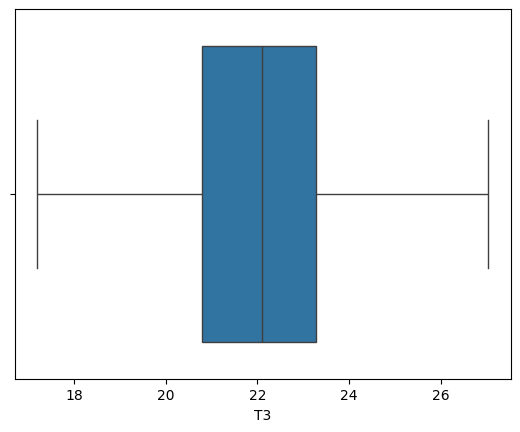

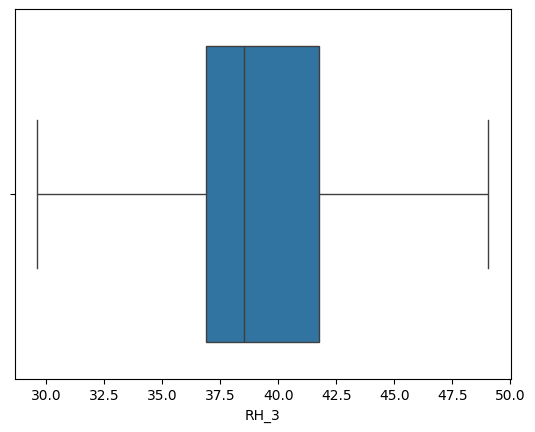

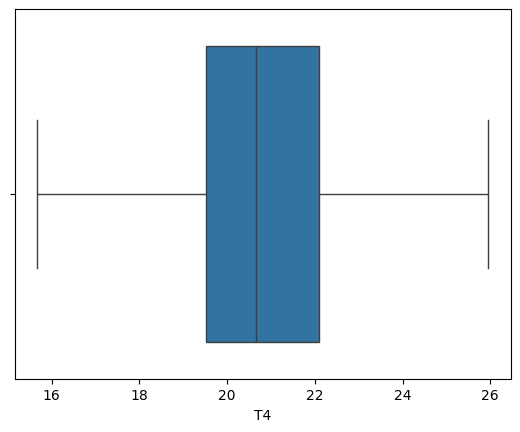

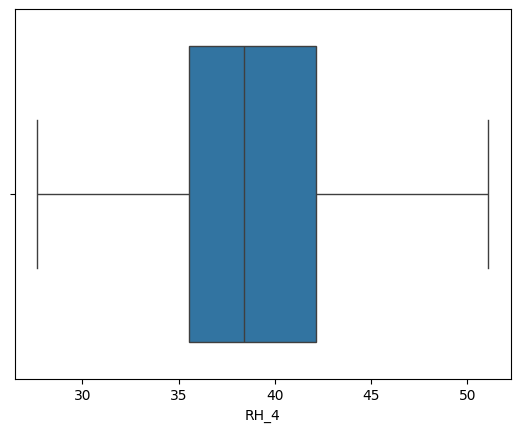

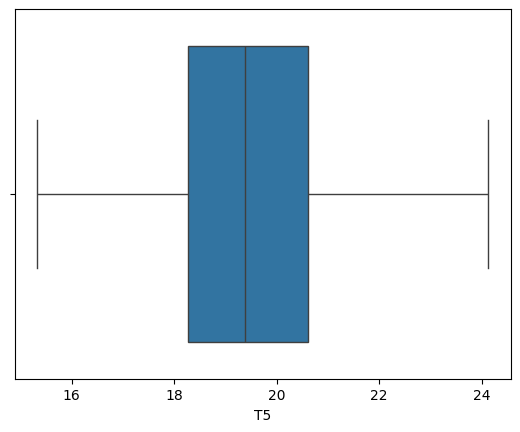

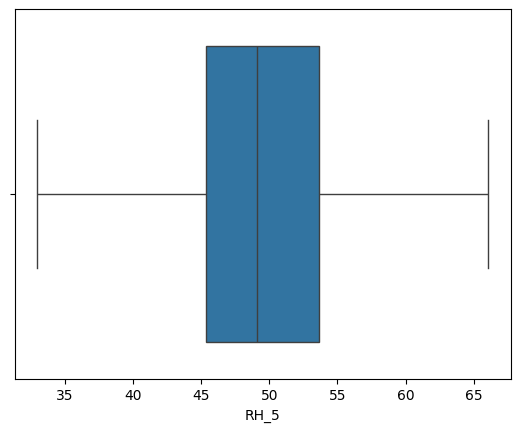

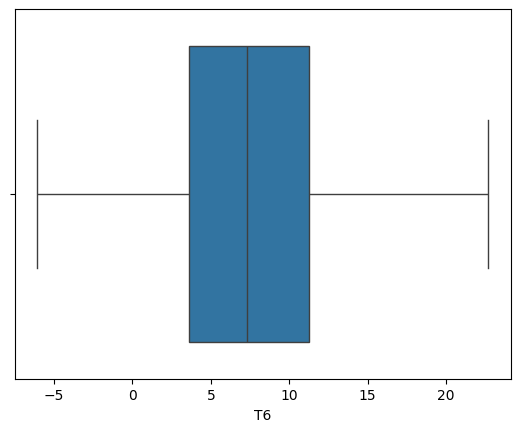

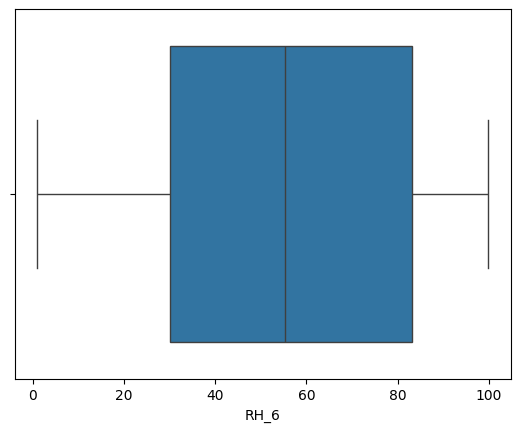

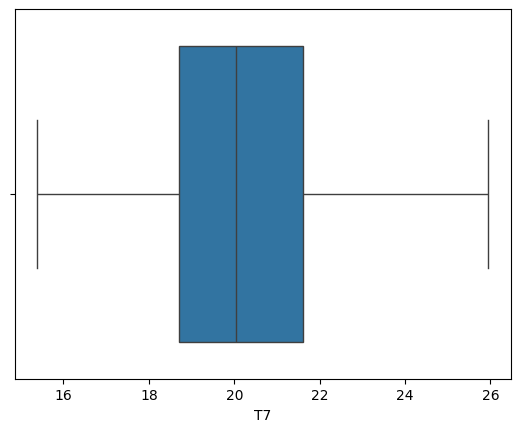

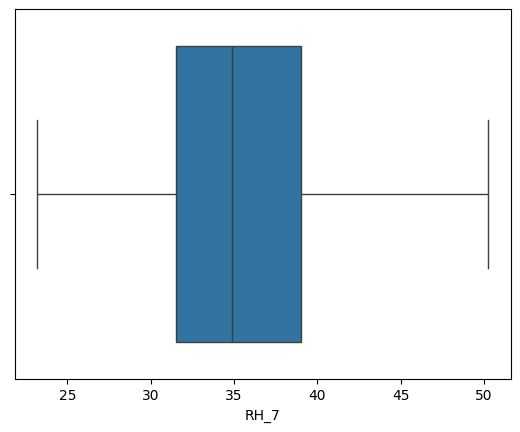

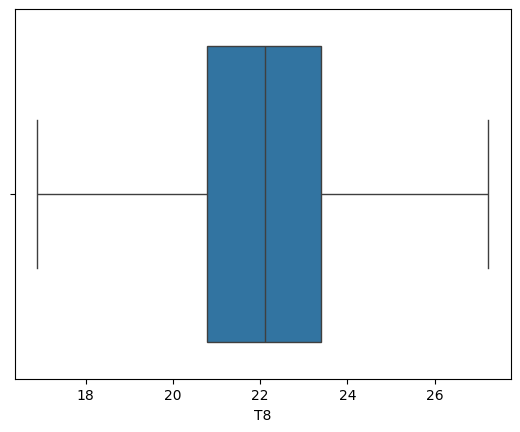

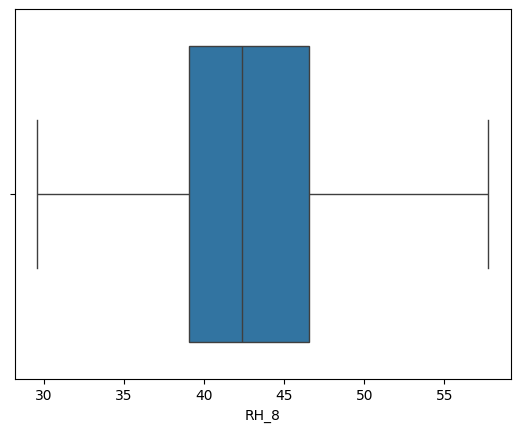

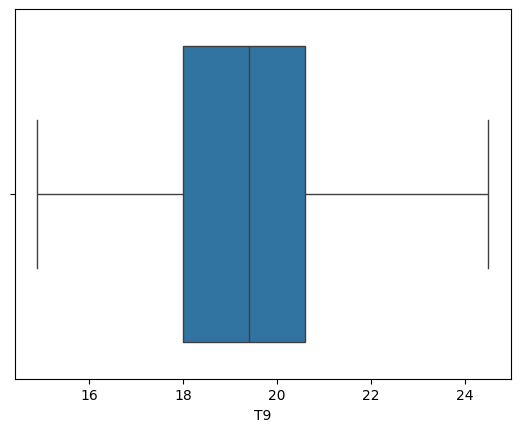

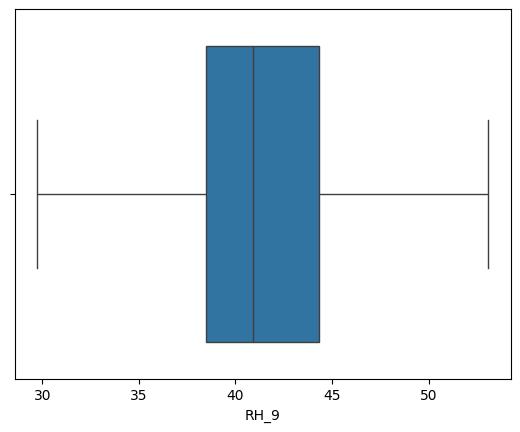

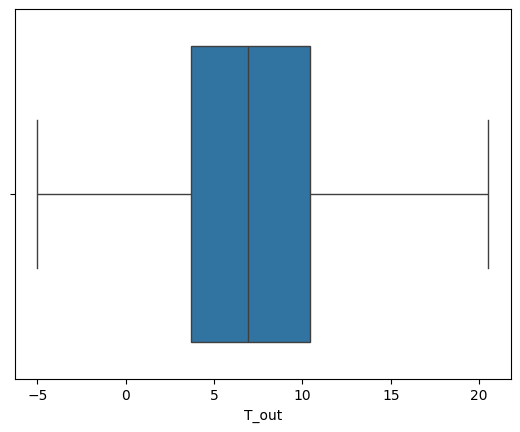

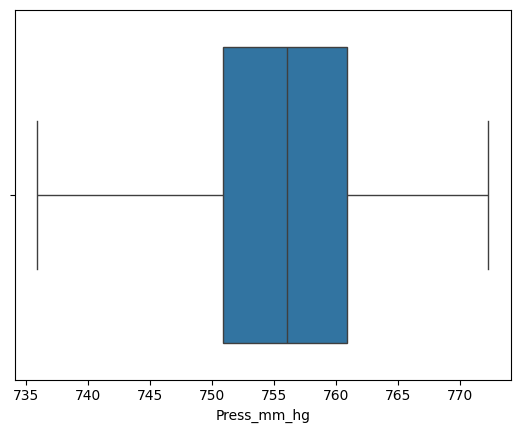

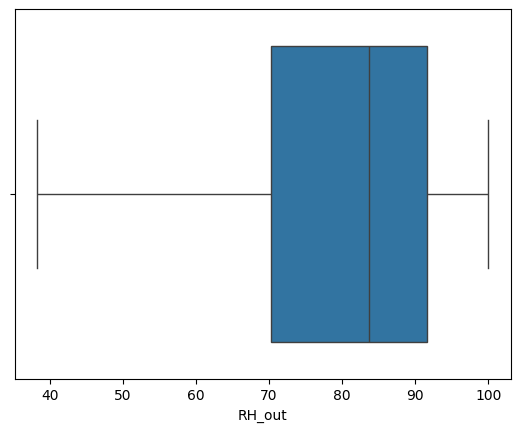

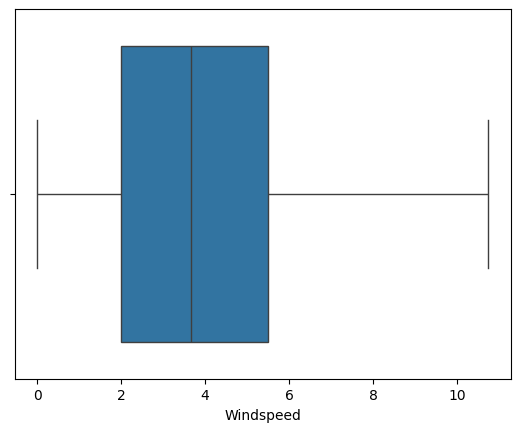

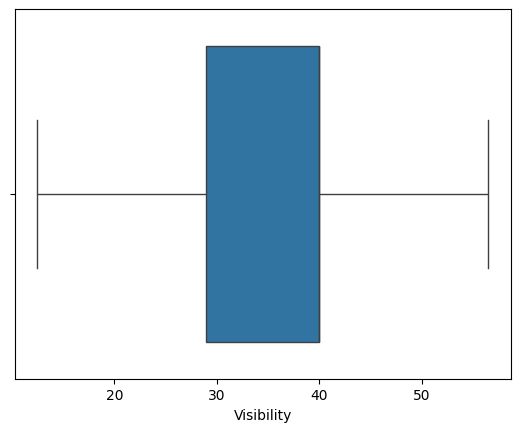

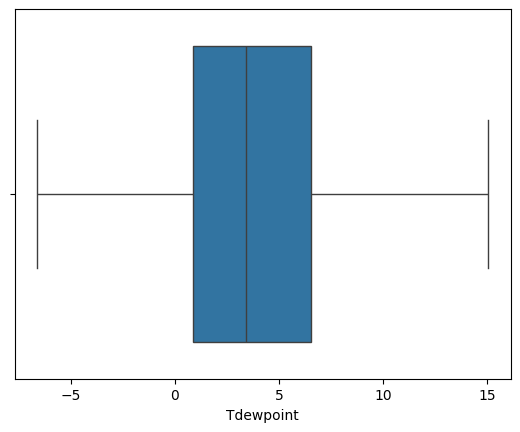

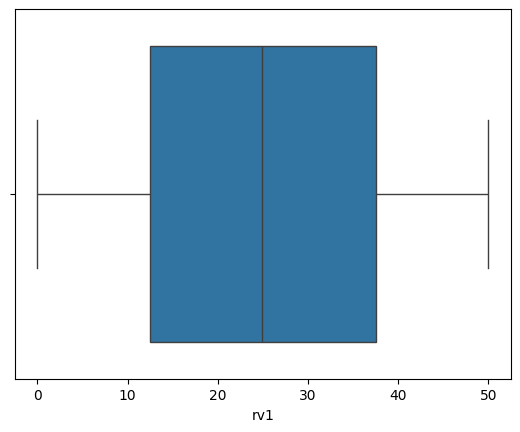

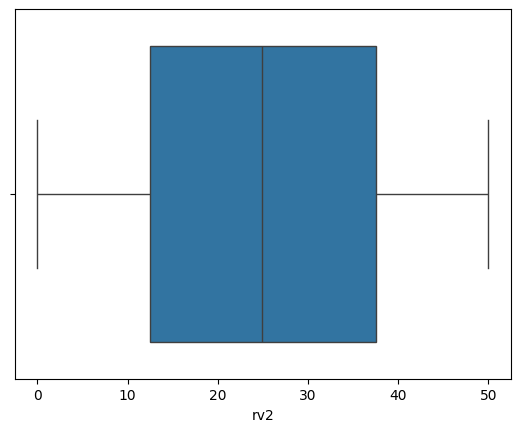

In [21]:
for i in num_cols.columns:
    sns.boxplot(x=i,data=df1)
    plt.show()

In [22]:
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60.0,0.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,735.933333,92.0,7.000000,56.500000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,0.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,735.933333,92.0,6.666667,56.500000,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,0.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,735.933333,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,0.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,735.933333,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,0.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,735.933333,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [23]:
df1.rename(columns={'Appliances':'Energy_usage'},inplace=True)

In [24]:
df2 = df1.drop('date',axis=1)

In [25]:
df2.head()

,Energy_usage,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,0.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,735.933333,92.0,7.000000,56.500000,5.3,13.275433,13.275433
1,60.0,0.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,735.933333,92.0,6.666667,56.500000,5.2,18.606195,18.606195
2,50.0,0.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,735.933333,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,0.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,735.933333,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,0.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,735.933333,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [26]:
df2.skew()  

Energy_usage    1.156157
lights          0.000000
T1              0.166939
RH_1            0.401822
T2              0.634604
RH_2           -0.146187
T3              0.383435
RH_3            0.466830
T4              0.192775
RH_4            0.444614
T5              0.534076
RH_5            0.734540
T6              0.456428
RH_6           -0.241961
T7              0.254697
RH_7            0.237275
T8             -0.246628
RH_8            0.305941
T9              0.382711
RH_9            0.370684
T_out           0.398211
Press_mm_hg    -0.338726
RH_out         -0.846254
Windspeed       0.790130
Visibility      0.157975
Tdewpoint       0.239017
rv1             0.004945
rv2             0.004945
dtype: float64

In [27]:
pt = PowerTransformer(method='yeo-johnson')

In [28]:
numerical_features = df2.select_dtypes(include=['int64','float64']).columns

In [29]:
df2[numerical_features] = pt.fit_transform(df2[numerical_features])

In [30]:
df2[numerical_features].skew()

Energy_usage    0.005534
lights          0.000000
T1             -0.000159
RH_1            0.005847
T2              0.022846
RH_2           -0.000620
T3              0.004755
RH_3            0.029135
T4             -0.000010
RH_4            0.032063
T5              0.003958
RH_5            0.010572
T6              0.077813
RH_6           -0.425103
T7              0.001656
RH_7           -0.004790
T8             -0.016761
RH_8            0.003277
T9              0.007446
RH_9            0.005476
T_out           0.047332
Press_mm_hg    -0.020158
RH_out         -0.253118
Windspeed      -0.008516
Visibility     -0.024609
Tdewpoint       0.030371
rv1            -0.244695
rv2            -0.244695
dtype: float64

In [31]:
df3 = df2[numerical_features]

## correlation

In [32]:
correlation = df3.corr()

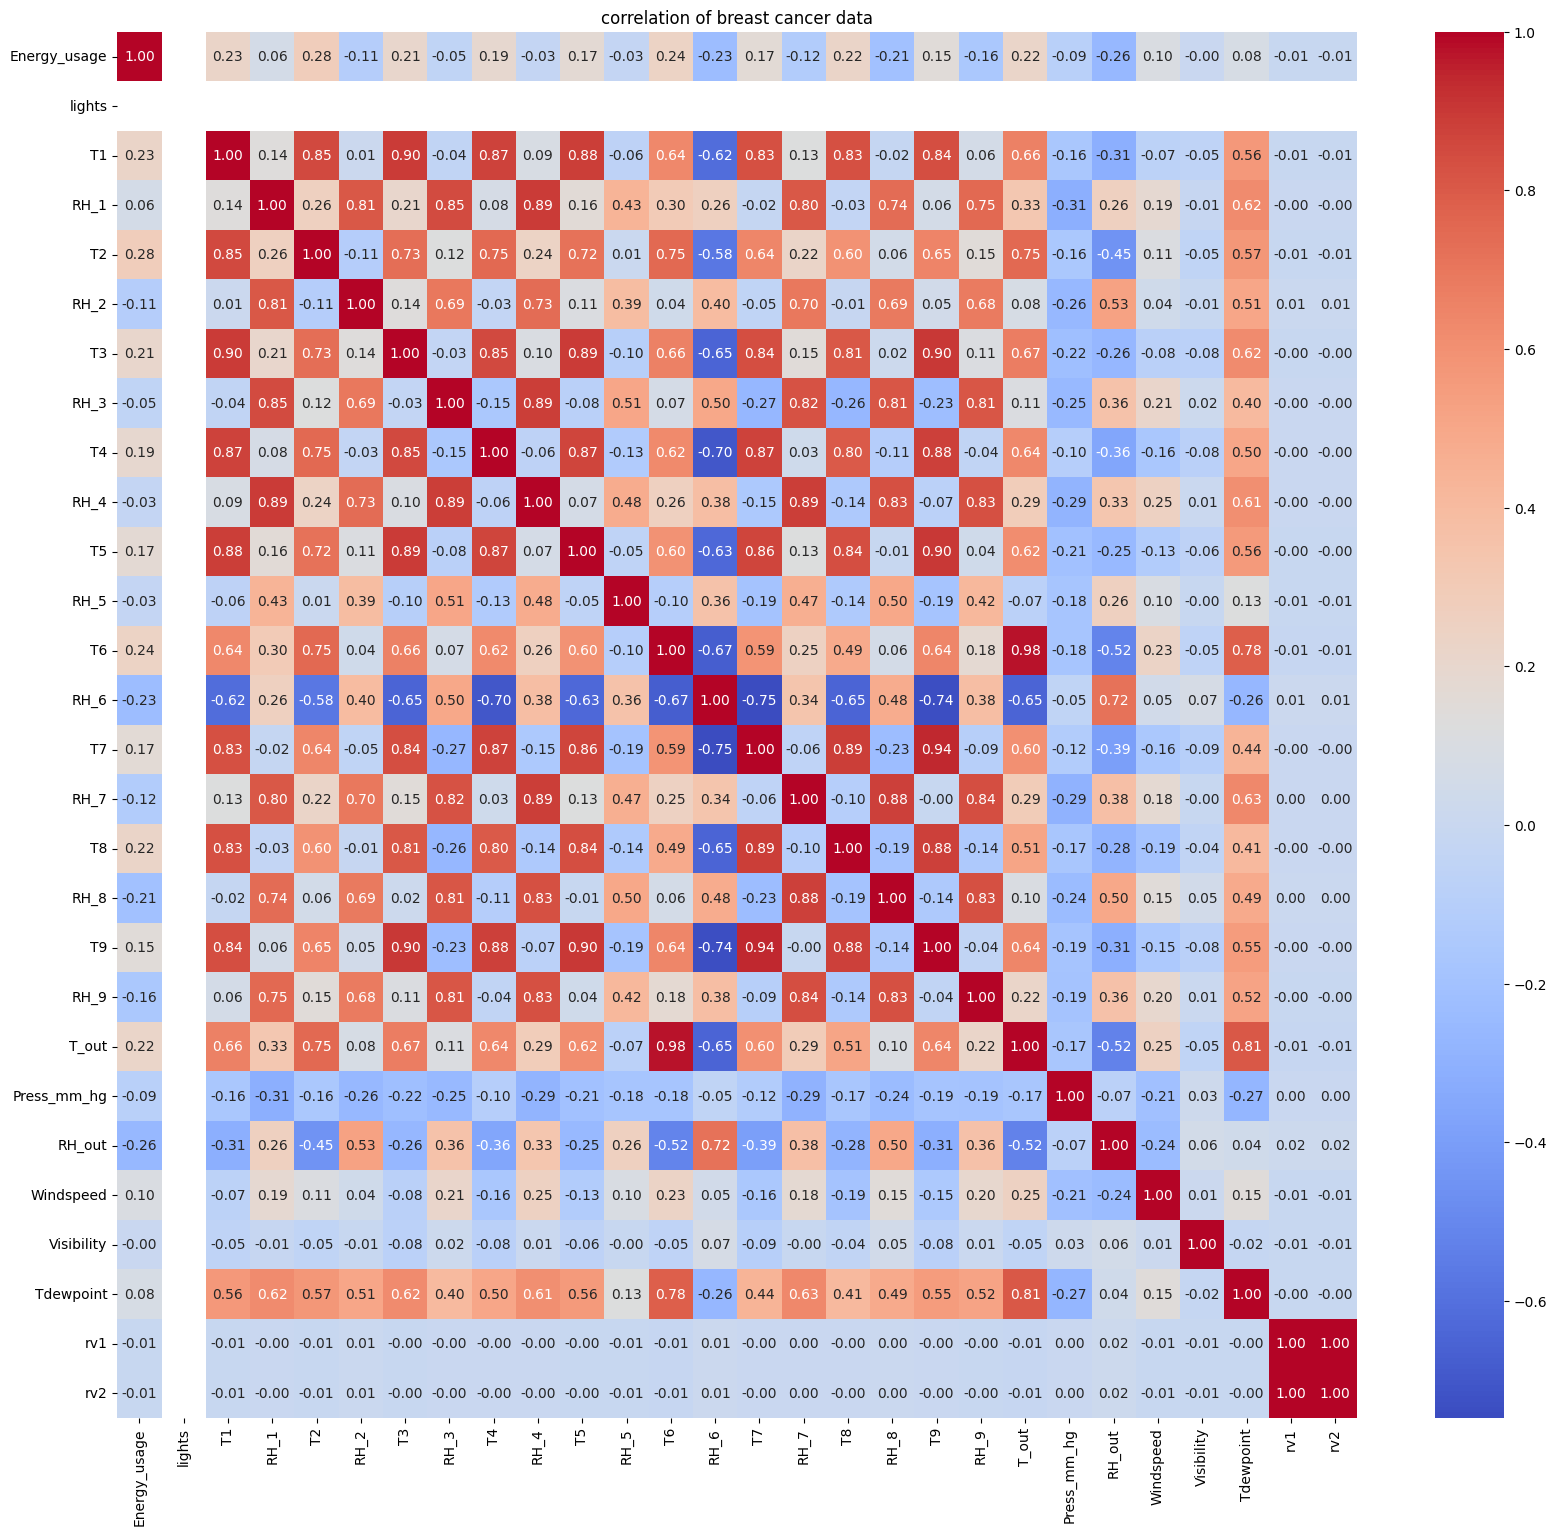

In [33]:
plt.figure(figsize=(20,18))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm') 
plt.title("correlation of breast cancer data")
plt.show()

## Feature Selection

In [34]:
df3.head(2)

,Energy_usage,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.240595,0.0,-1.150056,1.717942,-0.454658,1.101118,-1.310485,1.550741,-0.908695,1.415752,...,-1.280966,0.976410,-0.091021,-2.352372,0.878538,1.196112,1.727391,0.390806,-0.738381,-0.738381
1,-0.240595,0.0,-1.150056,1.539380,-0.454658,1.083242,-1.310485,1.563816,-0.908695,1.487005,...,-1.260487,0.982727,-0.113215,-2.352372,0.878538,1.105732,1.727391,0.367900,-0.344138,-0.344138


In [35]:
X= df3.drop('Energy_usage',axis=1)
y=df3['Energy_usage']

In [36]:
sk = SelectKBest(score_func=f_regression,k=10)

In [37]:
X_new = sk.fit_transform(X,y)

In [38]:
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['T1', 'T2', 'T3', 'T4', 'T6', 'RH_6', 'T8', 'RH_8', 'T_out', 'RH_out'], dtype='object')

Feature Score:
        feature        Score
3            T2  1652.166160
21       RH_out  1421.473767
11           T6  1165.493710
12         RH_6  1101.673078
1            T1  1084.227061
15           T8  1034.916680
19        T_out   983.768256
5            T3   895.069256
16         RH_8   871.080986
7            T4   763.014374
9            T5   591.789765
13           T7   554.418781
18         RH_9   498.983193
17           T9   459.252152
14         RH_7   292.329614
4          RH_2   232.743649
22    Windspeed   205.222842
20  Press_mm_hg   159.840139
24    Tdewpoint   138.931201
2          RH_1    76.579940
6          RH_3    47.551667
10         RH_5    18.052506
8          RH_4    13.144979
26          rv2     1.246311
25          rv1     1.246311
23   Visibility     0.130659
0        lights     0.000000


In [39]:
X_selected = X[selected_features]

In [40]:
X_selected.columns

Index(['T1', 'T2', 'T3', 'T4', 'T6', 'RH_6', 'T8', 'RH_8', 'T_out', 'RH_out'], dtype='object')

In [41]:
scaler = StandardScaler()

In [42]:
X_scaled = scaler.fit_transform(X_selected)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [44]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (15788, 10)
X test shape : (3947, 10) 
Y train shape : (15788,)
y test shape : (3947,)



In [45]:
models ={
    '1.Linear Regression':LinearRegression(),
    '2.DecisionTree':DecisionTreeRegressor(),
    '3.RandomForestRegressor':RandomForestRegressor(),
    '4.Svr':SVR(),
    '5.GradientBoostRegressor':GradientBoostingRegressor()
}

In [46]:
results ={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    mae = mean_absolute_error,(y_test,y_pred)
    mse= mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    results[model_name] =(mae,mse,rmse,r2)

In [47]:
result_df = pd.DataFrame(results).T

In [48]:
result_df

,0,1,2,3
1.Linear Regression,(<function mean_absolute_error at 0x00000277C0...,0.856714,0.925589,0.159336
2.DecisionTree,(<function mean_absolute_error at 0x00000277C0...,0.521116,0.721883,0.488647
3.RandomForestRegressor,(<function mean_absolute_error at 0x00000277C0...,0.271971,0.521508,0.733125
4.Svr,(<function mean_absolute_error at 0x00000277C0...,0.595851,0.771914,0.415312
5.GradientBoostRegressor,(<function mean_absolute_error at 0x00000277C0...,0.65162,0.80723,0.360588


In [49]:
#Hyperparameter tuning
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [51]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [52]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=50, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.7107866007879183


In [54]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [55]:
best_model = RandomForestRegressor(max_features = 'sqrt',n_estimators =300,n_jobs =-1 , random_state=42)

In [56]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [60]:
y_pred = best_model.predict(X_test)

In [61]:
mae = mean_absolute_error,(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [64]:
print(f"mae:{mae} , mse:{mse},rmse{rmse},R2:{r2}")

mae:(<function mean_absolute_error at 0x00000277C00F56C0>, (8980    -1.103997
2754     0.560135
9132    -0.620965
14359   -0.620965
8875     0.071095
           ...   
9815     0.333858
9925     0.758242
14088   -0.240595
17356    0.071095
17547   -0.620965
Name: Energy_usage, Length: 3947, dtype: float64, array([-0.44348573,  0.40441431, -0.79142137, ..., -0.39510141,
        0.11190928, -0.15592694]))) , mse:0.2653698815022303,rmse0.5151406424484777,R2:0.739601818858717


## save best model using joblib

In [65]:
joblib.dump(best_model,"EnergyDataRandomForest_model.joblib")

['EnergyDataRandomForest_model.joblib']

In [66]:
load_model = joblib.load("EnergyDataRandomForest_model.joblib")

## pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [68]:
#create pipleline
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'mean')),
    ('model',best_model)
])

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300,
                                       n_jobs=-1, random_state=42))])

In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
#save this pipeline
joblib.dump(pipeline,"Randompipeline.joblib")

['Randompipeline.joblib']

In [9]:
loaded_pipeline = joblib.load("Randompipeline.joblib")

In [4]:
# #take some random data in your dataset
unseen_data = pd.read_csv("unseen.csv")

In [6]:
df_unseen = pd.DataFrame(unseen_data)
df_unseen.head()

,Energy_usage,T1,T2,T3,T4,T6,RH_6,T8,RH_8,T_out,RH_out
0,60,19.89,19.2,19.79,19.000000,7.026667,84.256667,18.2,48.900000,6.60,92.0
1,60,19.89,19.2,19.79,19.000000,6.833333,84.063333,18.2,48.863333,6.48,92.0
2,50,19.89,19.2,19.79,18.926667,6.560000,83.156667,18.2,48.730000,6.37,92.0
3,50,19.89,19.2,19.79,18.890000,6.433333,83.423333,18.1,48.590000,6.25,92.0
4,60,19.89,19.2,19.79,18.890000,6.366667,84.893333,18.1,48.590000,6.13,92.0


In [7]:
df_unseen.drop(columns=['Energy_usage'],inplace=True,axis=1)

In [10]:
#prediction
prediction = loaded_pipeline.predict(df_unseen)

In [18]:
print(f"Prediction: {prediction[0]}")

Prediction: 0.6200715820116016


## Prediction

In [14]:
df_unseen['Predicted_energy'] = prediction

In [15]:
df_unseen.to_csv('unseen.csv',index=False)

In [16]:
df_unseen.head(2)

,T1,T2,T3,T4,T6,RH_6,T8,RH_8,T_out,RH_out,Predicted_energy
0,19.89,19.2,19.79,19.0,7.026667,84.256667,18.2,48.900000,6.60,92.0,0.620072
1,19.89,19.2,19.79,19.0,6.833333,84.063333,18.2,48.863333,6.48,92.0,0.620072
